# 《最优化方法》第二章
## 第二章：凸集
授课教师：柳文章
代码演示：凸组合、凸包
代码语言：Python
主要工具包：matplotlib.pyplot
代码地址：https://github.com/wenzhangliu/ConvexOptimizationCourse

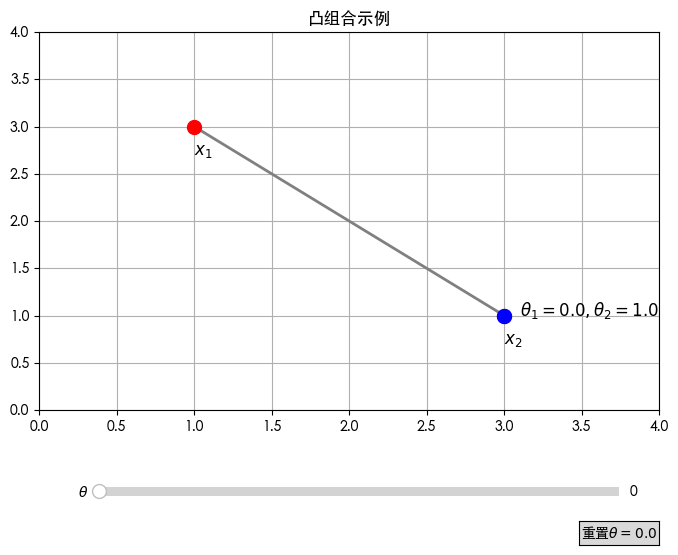

In [1]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import numpy as np

plt.rcParams['font.family'] = 'Heiti TC'  # 设置中文字体

# 创建图形和轴
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(bottom=0.25)  # 给滑动条预留空间

# 点的坐标
x_1 = np.array([1.0, 3.0])  # 点x_1的坐标（二维）
x_2 = np.array([3.0, 1.0])  # 点x_2的坐标（二维）

# 绘制固定的 x_1 和 x_2
plt.title('凸组合示例')
plt.xlim([0, 4.0])
plt.ylim([0, 4.0])
plt.grid()
line, = plt.plot([x_1[0], x_2[0]], [x_1[1], x_2[1]], color='gray', linewidth=2)
plt.scatter(*x_1, color='red', s=100, zorder=2, label="x_1")  # 绘制点x_1
plt.scatter(*x_2, color='red', s=100, zorder=2, label="x_2")  # 绘制点x_2
plt.text(x_1[0], x_1[1]-0.3, r'$x_1$', fontsize=12)
plt.text(x_2[0], x_2[1]-0.3, r'$x_2$', fontsize=12)

# 初始凸组合点
initial_theta = 0.0
initial_x = initial_theta * x_1 + (1 - initial_theta) * x_2
scatter_point = plt.scatter(*initial_x, color='blue', s=100, zorder=2, label="凸组合点")
text_label = ax.text(initial_x[0] + 0.1, initial_x[1], r"$\theta_1=0.0, \theta_2=1.0$", fontsize=12, color='black')

# 创建滑动条
ax_slider = fig.add_axes([0.2, 0.1, 0.65, 0.03])
slider = Slider(ax=ax_slider, label=r"$\theta$", valmin=0, valmax=1.0, valinit=0.0, orientation="horizontal")


# 更新函数
def update(val):
    theta = slider.val  # 获取滑动条当前的值
    new_x = theta * x_1 + (1 - theta) * x_2  # 计算凸组合点坐标
    scatter_point.set_offsets(np.array([new_x]))  # 直接更新散点位置
    text_label.set_position((new_x[0] + 0.1, new_x[1]))  # 更新文本位置
    text_label.set_text(r"$\theta_1=$"+f"{round(theta, 2)}, " + r"$\theta_2=$"+f"{round(1-theta, 2)}")  # 更新文本内容
    fig.canvas.draw_idle()  # 刷新画布


def reset(event):
    slider.reset()


# 绑定滑动条事件和重置事件
slider.on_changed(update)
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, r'重置$\theta=0.0$', hovercolor='0.975')
button.on_clicked(reset)

# 显示图形
plt.show()